# Реалізація алгоритму Гафмана

In [2]:
import matplotlib.pyplot as plt
from datetime import datetime
import sys
import tqdm

In [4]:
class Node:
    """
    Class of the node
    """
    def __init__(self, character=None, frequency=0, left=None, right=None):
        """
        Constructor
        """
        self.character = character
        self.frequency = frequency
        self.left = left
        self.right = right


class HuffmanCode:
    """
    Huffman class
    """
    def __init__(self):
        """
        Constructor
        """
        self.frequency_dict = {}
        self.code_dict = {}

    def build_freq_dict(self, data):
        """
        Builds frequency dict
        """
        for character in data:
            if character in self.frequency_dict:
                self.frequency_dict[character] += 1
            else:
                self.frequency_dict[character] = 1

    def build_tree(self):
        """
        Builds tree
        """
        nodes = []
        for character, frequency in self.frequency_dict.items():
            nodes.append(Node(character=character, frequency=frequency))

        while len(nodes) > 1:
            nodes = sorted(nodes, key=lambda x: x.frequency)
            left = nodes.pop(0)
            right = nodes.pop(0)
            parent = Node(frequency=left.frequency + right.frequency, left=left, right=right)
            nodes.append(parent)

        return nodes[0]

    def build_code_dict(self, node, code=''):
        """
        Build code dictionary
        """
        if not node.left and not node.right:
            self.code_dict[node.character] = code
        else:
            self.build_code_dict(node.left, code + '0')
            self.build_code_dict(node.right, code + '1')

    def encode(self, data):
        """
        Encode the input data
        """
        self.build_freq_dict(data)
        tree = self.build_tree()
        self.build_code_dict(tree)
        encoded_data = ''.join([self.code_dict[character] for character in data])
        return encoded_data

    def decode(self, encoded_data):
        """
        Decode Huffman to string
        """
        decoded_text = ''
        current = tree = self.build_tree()
        for bit in encoded_data:
            current = current.left if bit == '0' else current.right
            if not current.left and not current.right:
                decoded_text += current.character
                current = tree

        return decoded_text


## Перевірка на кількість витраченого часу роботи алгоритма з різними файлами, розмір до і після кодування, відсоток стиснення

In [19]:
data_file = ["test.txt","test1.txt","test2.txt","test3.txt"]
for i in data_file:
    with open(i, "r", encoding="UTF-8") as data:
        test_data = str([i.strip() for i in data.readlines()])
    print(f"length of file: {len(test_data)}")
    start_time = datetime.now()
    encoded = HuffmanCode().encode(test_data)
    end_time = datetime.now()
    print('algorithm work time: {}'.format(end_time - start_time))
    print(f"text size encoded file: {sys.getsizeof(encoded)/1000000} mb, bufer{1000}")
    print(f"text size start file with length : {sys.getsizeof(test_data)/1000000} mb")
    print(f'на скільки повідомлення закодоване: {100 - ((100 * (len(HuffmanCode().encode(data=test_data))/8))/((len(test_data))))} %\n')

length of file: 14979448
algorithm work time: 0:00:02.591963
text size encoded file: 62.381051 mb, bufer1000
text size start file with length : 14.979497 mb
на скільки повідомлення закодоване: 47.944508702857405 %

length of file: 869
algorithm work time: 0:00:00.005246
text size encoded file: 0.003332 mb, bufer1000
text size start file with length : 0.000918 mb
на скільки повідомлення закодоване: 52.77617951668584 %

length of file: 520200
algorithm work time: 0:00:00.099542
text size encoded file: 1.143724 mb, bufer1000
text size start file with length : 0.520249 mb
на скільки повідомлення закодоване: 72.51838235294117 %

length of file: 14979448
algorithm work time: 0:00:02.650332
text size encoded file: 62.381051 mb, bufer1000
text size start file with length : 14.979497 mb
на скільки повідомлення закодоване: 47.944508702857405 %



## Побудова графіка для файлів різного розміру порівняння часу до кількості символів

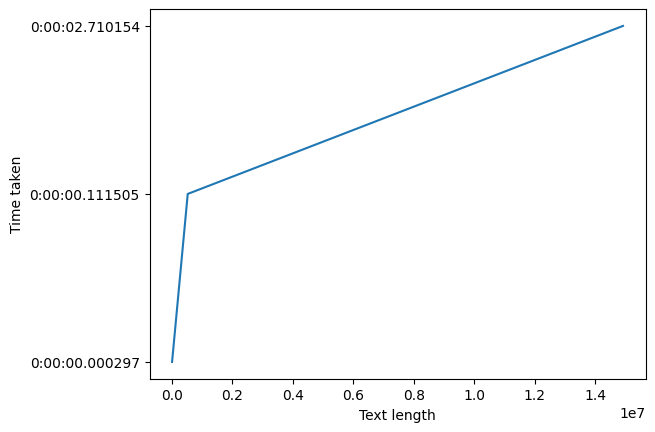

In [20]:
def test_huffman():
    files = ["test1.txt", "test2.txt", "test3.txt"]
    time_taken = []
    length = []
    for file_path in files:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = file.read()
        length.append(len(data))
        start = datetime.now()
        lzw = HuffmanCode()
        lzw.encode(data)
        end = datetime.now()
        time_taken.append(str(end - start))
    plt.xlabel('Text length')
    plt.ylabel('Time taken')
    x = length
    y = time_taken
    plt.plot(x, y)
test_huffman()